<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj12/wprowadzenie_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# KMeans & AgglomerativeClustering

In [20]:
# Generowanie sztucznych danych
X, _ = make_blobs(n_samples=16, centers=3, cluster_std=0.60, random_state=0)

In [21]:
X.shape

(16, 2)

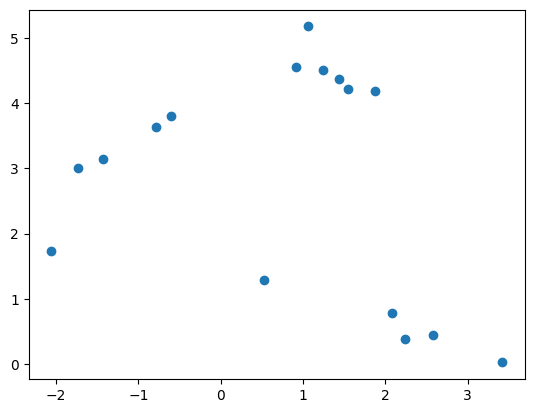

In [22]:
plt.scatter(X[:,0], X[:,1], marker='o')

- linkage + dendrogram - eksploracja, zrozumienie struktury
- AgglomerativeClustering - faktyczna klasteryzacja danych

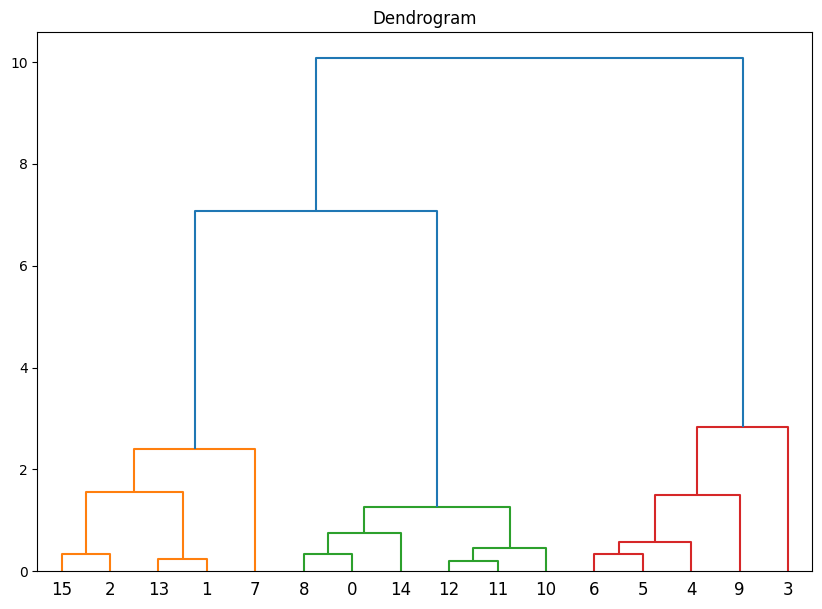

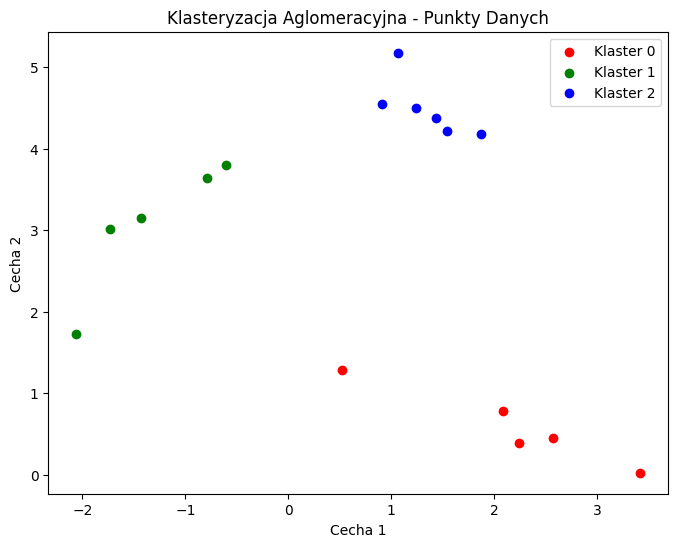

In [23]:
# Wygenerowanie połączeń między danymi do stworzenia dendrogramu
linked = linkage(X, "ward")

# Rysowanie dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()

# Teraz możemy zdecydować o liczbie klastrów, które chcemy utworzyć, "przecinając" dendrogram
# na przykład na wysokości 10, co da nam 3 klastry
# Możemy teraz utworzyć model AgglomerativeClustering z tą liczbą klastrów
# Używamy linkage "ward", który minimalizuje wewnątrzgrupową sumę kwadratów
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")

# Dopasowanie modelu do danych
clustering_model.fit(X)

# Rysowanie punktów danych z oznaczeniem klastra, do którego należą
# Prosta lista kolorów
colors = ["red", "green", "blue"]

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
for cluster_id, color in zip(range(len(colors)), colors):
    # Wybieranie punktów należących do danego klastra
    cluster_points = X[clustering_model.labels_ == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f"Klaster {cluster_id}")

plt.title("Klasteryzacja Aglomeracyjna - Punkty Danych")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.legend()

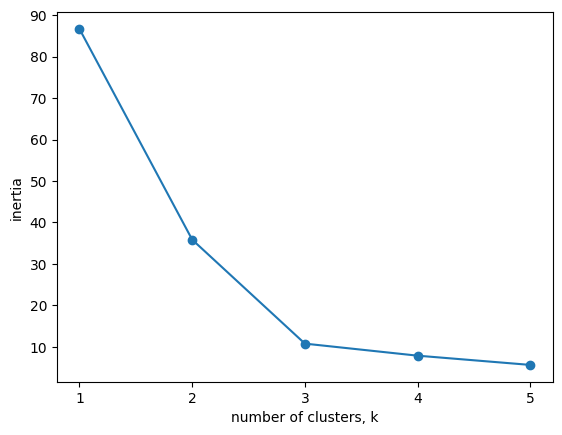

In [24]:
ks = range(1, 6)
inertias = [] # lista inercji - sum kwadratów odległości każdego punktu danych od najbliższego centroidu

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

In [25]:
# Wybieramy liczbę klastrów - 3
model = KMeans(n_clusters=3)

# Fit model to samples
model.fit(X)

KMeans(n_clusters=3)

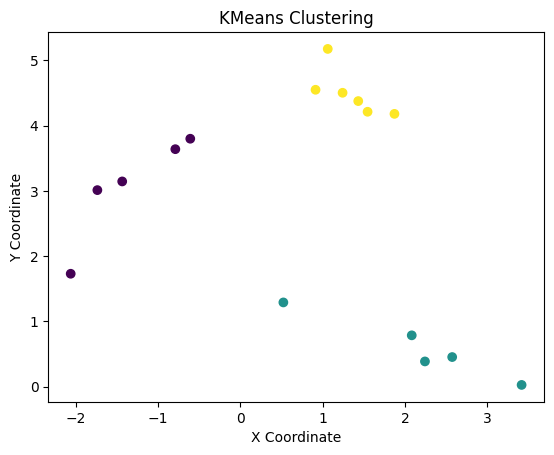

In [26]:
# Step 3: Get the cluster labels
labels = model.labels_

# Step 4: Plotting the results
# Plot the points with different colors based on their cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()